# Hypothesis test (Part II)

The following code was designed to test for differences in relation to three further items: 1) whether recipients change their radon risk perception because of the information they received; 2) how they perceive the radon risk after considering the information; and 3) whether they have the intention to test radon levels at home.

In [3]:
# Import libraries
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, shapiro
from itertools import combinations
import scipy.stats as stats
import researchpy as rp
import pingouin as pg
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

## Function

In [4]:
# function to calculate relative cross tabulation by rows and display heatmap
def cross_2_col(col1, col2):
    c1 = pd.crosstab(col1, col2)
    c2 = pd.crosstab(col1, col2).apply(lambda r: r/r.sum(), axis=1).round(2)
    c, p, dof, expected = chi2_contingency(c1)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(c2, annot=True,  linewidths=.5, ax=ax)
    print("===Chi2 Stat===")
    print(c)
    print("\n")
    print("===Dexperimental_grouprees of Freedom===")
    print(dof)
    print("\n")
    print("===P-Value===")
    print(p)
    significance = 0.1
    print('p-value=%.6f, significance=%.2f\n' % (p, significance))
    if p < significance:
        print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. 
    They are independent.""" % (significance))
    print("\n")
    print("===Contingency Table===")
    print(expected)
    return c1, plt.show()
# c is the chi-square
# p value
# dof is the dexperimental_groupree of freedom (n of rows - 1) * (n of col -1)


In [5]:
# import the data
control_group = pd.read_csv("05-12-2021_kontrollgruppe_df.csv", index_col=0) 
experimental_group = pd.read_csv("05-12-2021_untersuchungsgruppe_df.csv", index_col=0)

### Test 1: whether recipients change their radon risk perception because of the information they received
Aggregate Items RW01 to investigate whether recipients change their radon risk perception because of the information they received

In [6]:
# check n of valid cases
len(experimental_group.RW01_01.dropna()), len(control_group.RW01_01.dropna())

(186, 96)

In [7]:
# aggregate the four point likert scale to a two point scale to investigate significance
experimental_group["RW01_01_aggr"] = experimental_group["RW01_01"].map({"nein": "nein/eher nein", "eher nein": "nein/eher nein", "eher ja": "ja/eher ja", "ja" : "ja/eher ja", "Keine Angabe" : "Keine Angabe"})
control_group["RW01_01_aggr"] = control_group["RW01_01"].map({"nein": "nein/eher nein", "eher nein": "nein/eher nein", "eher ja": "ja/eher ja", "ja" : "ja/eher ja", "Keine Angabe" : "Keine Angabe"})

In [8]:
# remove keine angabe (no answer)
prov = experimental_group[experimental_group["RW01_01_aggr"] != "Keine Angabe"]

In [9]:
# create viz friendly dataset and labels
prov1 = experimental_group[experimental_group["RW01_01_aggr"] != "Keine Angabe"]
prov1['Gruppe'] = "experimental_group"
prov1 = prov1[["Gruppe", "RW01_01_aggr"]]
prov2 = control_group[control_group["RW01_01_aggr"] != "Keine Angabe"]
prov2['Gruppe'] = "control_group"
prov2 = prov2[["Gruppe", "RW01_01_aggr"]]

C:\Users\diego\AppData\Local\Temp/ipykernel_31168/370568342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov1['Gruppe'] = "experimental_group"


In [10]:
# append and check
prov = prov1.append(prov2)
prov

,Gruppe,RW01_01_aggr
0,experimental_group,nein/eher nein
1,experimental_group,NaN
2,experimental_group,NaN
3,experimental_group,NaN
4,experimental_group,nein/eher nein
...,...,...
95,control_group,nein/eher nein
96,control_group,ja/eher ja
97,control_group,ja/eher ja
98,control_group,ja/eher ja


===Chi2 Stat===
0.4283762100168349


===Dexperimental_grouprees of Freedom===
1


===P-Value===
0.5127867947243128
p-value=0.512787, significance=0.10

At 0.10 level of significance, we accept the null hypotheses. 
    They are independent.


===Contingency Table===
[[50.08695652 45.91304348]
 [93.91304348 86.08695652]]


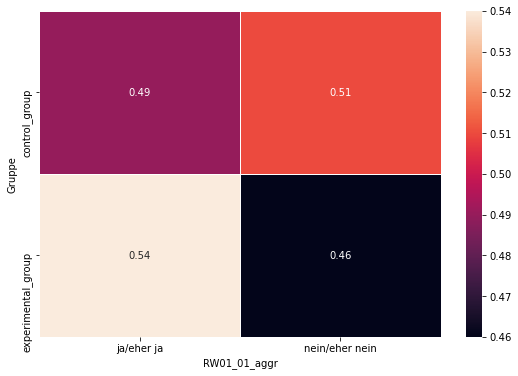

(RW01_01_aggr        ja/eher ja  nein/eher nein
 Gruppe                                        
 control_group               47              49
 experimental_group          97              83,
 None)

In [11]:
# calculate significan and p level
cross_2_col(prov['Gruppe'], prov["RW01_01_aggr"])

### Test 2: how they perceive the radon risk after considering the information
Aggregate Items RW02_01 to investigate how they perceive the radon risk after considering the information

In [12]:
# check n of cases
len(control_group["RW02_01"]), len(experimental_group["RW02_01"])

(100, 193)

In [13]:
# aggregate the four point likert scale to a two point scale to investigate significance
control_group["RW02_01_aggr"] = control_group["RW02_01"].map({"gering": "gering/eher gering", "eher gering": "gering/eher gering", "eher hoch": "hoch/eher hoch", "hoch" : "hoch/eher hoch", "Keine Angabe" : "Keine Angabe"})
experimental_group["RW02_01_aggr"] = experimental_group["RW02_01"].map({"gering": "gering/eher gering", "eher gering": "gering/eher gering", "eher hoch": "hoch/eher hoch", "hoch" : "hoch/eher hoch", "Keine Angabe" : "Keine Angabe"})

In [14]:
# remove no answers
prov = control_group[control_group["RW02_01"] != "Keine Angabe"]

In [15]:
# create viz friendly dataset and labels
prov1 = experimental_group[experimental_group["RW02_01_aggr"] != "Keine Angabe"]
prov1['Gruppe'] = "experimental_group"
prov1 = prov1[["Gruppe", "RW02_01_aggr"]]
prov2 = control_group[control_group["RW02_01_aggr"] != "Keine Angabe"]
prov2['Gruppe'] = "control_group"
prov2 = prov2[["Gruppe", "RW02_01_aggr"]]

C:\Users\diego\AppData\Local\Temp/ipykernel_31168/2224098844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov1['Gruppe'] = "experimental_group"
C:\Users\diego\AppData\Local\Temp/ipykernel_31168/2224098844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Gruppe'] = "control_group"


In [16]:
# append and check
prov = prov1.append(prov2)
prov

,Gruppe,RW02_01_aggr
0,experimental_group,gering/eher gering
1,experimental_group,hoch/eher hoch
2,experimental_group,gering/eher gering
3,experimental_group,gering/eher gering
4,experimental_group,gering/eher gering
...,...,...
95,control_group,hoch/eher hoch
96,control_group,hoch/eher hoch
97,control_group,gering/eher gering
98,control_group,gering/eher gering


===Chi2 Stat===
0.3989110728651058


===Dexperimental_grouprees of Freedom===
1


===P-Value===
0.5276521605987727
p-value=0.527652, significance=0.10

At 0.10 level of significance, we accept the null hypotheses. 
    They are independent.


===Contingency Table===
[[53.00357143 43.99642857]
 [99.99642857 83.00357143]]


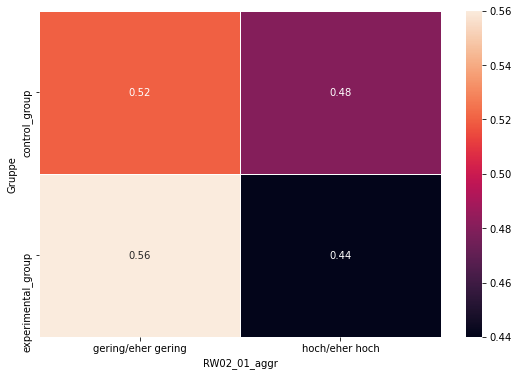

(RW02_01_aggr        gering/eher gering  hoch/eher hoch
 Gruppe                                                
 control_group                       50              47
 experimental_group                 103              80,
 None)

In [17]:
# calculate significan and p level
cross_2_col(prov['Gruppe'], prov["RW02_01_aggr"])

### Test 3: whether they have the intention to test radon levels at home.
Aggregate Items H101 to investigate whether they have the intention to test radon levels at home.

In [18]:
# check n of cases
len(control_group["H101"]), len(experimental_group["H101"])

(100, 193)

In [19]:
# create viz friendly dataset and labels
prov1 = pd.DataFrame(experimental_group[experimental_group["H101"] != "Keine Angabe"])
prov1['Gruppe'] = "experimental_group"
prov2 = pd.DataFrame(control_group[control_group["H101"] != "Keine Angabe"])
prov2['Gruppe'] = "control_group"
prov = prov1.append(prov2)
# calculate significan and p level
prov

,SD01,SD02_01,SD03_01,SD04,SD05_01,SD06,SD07,HI01,HI02,HI03,...,K001,M501_01,M501_02,M501_03,M501_04,M501_05,M501_06,M502_01,M502_02,M502_03
0,Männlich,1960,8228,Hochschulabschluß,2,Nein,Nein,Ich wohne zur Miete.,Nein,in einem Mehrfamilienhaus oder einer Wohnung,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Männlich,1958,9113,Ausbildung,2,Nein,Nein,Ich wohne zur Miete.,Nein,in einem Mehrfamilienhaus oder einer Wohnung,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Männlich,1963,1257,Ausbildung,2,Nein,Nein,Ich wohne zur Miete.,Nein,in einem Mehrfamilienhaus oder einer Wohnung,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Männlich,1979,94136,Schulabschluß,4,Ja,Nein,Ich wohne im eigenen Haus bzw. in der eigenen ...,Nein,in einem Ein- oder Zweifamilienhaus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Weiblich,1966,9122,Ausbildung,1,Nein,Nein,Ich wohne im eigenen Haus bzw. in der eigenen ...,Nein,in einem Mehrfamilienhaus oder einer Wohnung,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Weiblich,1957,1809,Hochschulabschluß,2,Nein,Nein,Ich wohne im eigenen Haus bzw. in der eigenen ...,Nein,in einem Ein- oder Zweifamilienhaus,...,Ich wohne angrenzend zu einem Radon-Gebiet bzw...,not_clicked,not_clicked,clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked
96,Weiblich,1944,8248,Ausbildung,1,Nein,Nein,Ich wohne im eigenen Haus bzw. in der eigenen ...,Nein,in einem Ein- oder Zweifamilienhaus,...,Ich wohne in einem Radon-Gebiet bzw. durchschn...,clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked
97,Männlich,1948,1737,Hochschulabschluß,2,Nein,Nein,Ich wohne im eigenen Haus bzw. in der eigenen ...,Nein,in einem Ein- oder Zweifamilienhaus,...,Ich wohne angrenzend zu einem Radon-Gebiet bzw...,clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked
98,Weiblich,1956,1744,Ausbildung,3,Nein,Nein,Ich wohne im eigenen Haus bzw. in der eigenen ...,Nein,in einem Ein- oder Zweifamilienhaus,...,Ich wohne angrenzend zu einem Radon-Gebiet bzw...,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked,not_clicked


===Chi2 Stat===
2.8072865751978204


===Dexperimental_grouprees of Freedom===
1


===P-Value===
0.09383697108054265
p-value=0.093837, significance=0.10

At 0.10 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


===Contingency Table===
[[ 17.64963504  75.35036496]
 [ 34.35036496 146.64963504]]


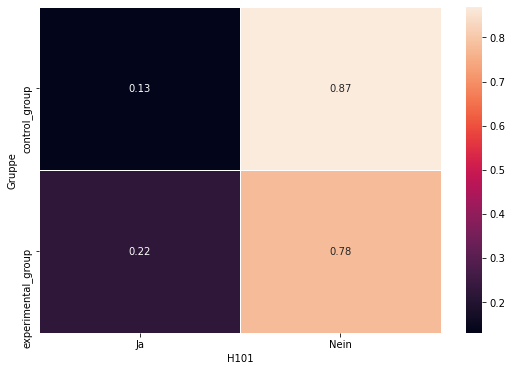

(H101                Ja  Nein
 Gruppe                      
 control_group       12    81
 experimental_group  40   141,
 None)

In [20]:
# calculate significan and p level
cross_2_col(prov['Gruppe'], prov["H101"])